## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from scipy.stats import randint
from common import start_pipeline, save_fig, VarianceThreshold_selector, prepare_dataset, display_scores


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Preparing dataset

In [2]:
descriptors_output_3classes = pd.read_csv('./data/descriptors_output.csv')
descriptors_output_3classes.head(3)

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL162083,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL350898,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL161187,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
tidy_target_HepG2_3classes = pd.read_csv('./data/tidy_target_HepG2_3classes.csv')
tidy_target_HepG2_3classes.head(3)

,molecule_chembl_id,cleaned_canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,active,460.270,3.6773,1.0,6.0,7.0
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,active,675.539,6.7974,1.0,10.0,7.0
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,active,447.251,4.2209,3.0,4.0,6.0


## Features

In [4]:
X_train, X_test, y_train, y_test, dataf, X = (tidy_target_HepG2_3classes
                                              .pipe(start_pipeline)
                                              .pipe(prepare_dataset, descriptors_output_3classes))

In [5]:
dataf.head()

,molecule_chembl_id,cleaned_canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50,PubchemFP0,PubchemFP1,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,active,460.270,3.6773,1.0,6.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,active,675.539,6.7974,1.0,10.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,active,447.251,4.2209,3.0,4.0,6.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL162083,O=S(=O)(CC#C/C=C\C#CCO)c1ccccc1,active,260.314,1.0156,1.0,3.0,8.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL350898,COc1ccc(S(=O)(=O)CC#C/C=C\C#CCO)cc1,active,290.340,1.0242,1.0,4.0,8.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X.head()

,PubchemFP2,PubchemFP3,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,...,PubchemFP735,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X_train.shape, y_train.shape

((14584, 186), (14584,))

In [8]:
X_test.shape, y_test.shape

((3647, 186), (3647,))

## Model building 

### Random Forest

In [9]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
r_square_forest_reg = forest_reg.score(X_test, y_test)
r_square_forest_reg

0.6335935766203742

In [11]:
forest_reg_predictions = forest_reg.predict(X_test)
forest_reg_predictions

array([5.40249573, 5.02066318, 4.46553824, ..., 7.36483375, 4.95608151,
       7.33065767])

In [12]:
print("Predictions:", forest_reg_predictions[:10], '\n')
print("Labels:", np.array(y_train[:10]))

Predictions: [5.40249573 5.02066318 4.46553824 5.41173296 5.13737553 5.99993839
 5.35093634 4.42007113 5.6224371  4.63656695] 

Labels: [6.45099674 4.39999997 4.         4.         4.42945706 4.03329522
 4.06048075 4.74763249 4.65013992 4.35066514]


In [13]:
comparison_forest_reg  = list(zip(list(forest_reg_predictions[:10]), list(y_train[:10])))
comparison_forest_reg

[(5.402495726476326, 6.450996737974213),
 (5.02066318130816, 4.399999967876858),
 (4.465538242333221, 4.0),
 (5.411732964186887, 4.0),
 (5.13737553155142, 4.429457060118104),
 (5.999938388710852, 4.033295223342125),
 (5.350936335409454, 4.060480747381382),
 (4.420071129660792, 4.747632485540102),
 (5.6224371035772265, 4.6501399178076674),
 (4.636566946966265, 4.350665141287858)]

In [14]:
100 - ((5.705464963682704 / 6.102372908709557) * 100)

6.504157496838147

### Percentage difference from actual values for first 10 samples

In [15]:
for x in comparison_forest_reg:
#     print(x)
    print(f'{(abs((100 - (x[0]/x[1])*100))):0.2f}')

16.25
14.11
11.64
35.29
15.98
48.76
31.78
6.90
20.91
6.57


### Model's `RMSE`

In [16]:
forest_reg_mse = mean_squared_error(y_test, forest_reg_predictions)
forest_reg_rmse = np.sqrt(forest_reg_mse)
forest_reg_rmse

0.7362754628330616

### Better evaluation with Cross-Validation

In [17]:
forest_reg_scores = cross_val_score(forest_reg,
                                    X_train,
                                    y_train,
                                    scoring='neg_mean_squared_error',
                                    cv=5)

forest_reg_rmse_scores = (np.sqrt(-forest_reg_scores))

In [18]:
display_scores(forest_reg_rmse_scores)

scores: [0.7783471  0.81366865 0.75786389 0.77895527 0.73408508]
mean: 0.772583999968744
standard deviation: 0.02630818613029318


## DecisionTreeRegressor

In [19]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
r_square_tree_reg = tree_reg.score(X_test, y_test)

In [21]:
tree_reg_predictions = tree_reg.predict(X_test)
tree_reg_predictions

array([6.52287875, 5.0418599 , 3.        , ..., 8.09301885, 4.        ,
       6.8256494 ])

In [22]:
tree_reg_mse = mean_squared_error(y_test, tree_reg_predictions)
tree_reg_rmse = np.sqrt(tree_reg_mse)
tree_reg_rmse

1.0168424531398281

**Cross-Validation**

In [23]:
tree_reg_scores = cross_val_score(tree_reg,
                                 X_train,
                                 y_train,
                                 scoring='neg_mean_squared_error',
                                 cv=5)

tree_reg_rmse_scores = (np.sqrt(-tree_reg_scores))

display_scores(tree_reg_rmse_scores)

scores: [1.00743162 1.07541448 1.0622948  1.06215357 0.95420316]
mean: 1.0322995272319102
standard deviation: 0.04553533868175562


### Linear Regression

In [24]:
np.random.seed(42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
r_square_lin_reg = lin_reg.score(X_test, y_test)
r_square_lin_reg

0.1037248398599816

In [26]:
lin_reg_predictions = lin_reg.predict(X_test)
lin_reg_predictions

array([5.86172285, 5.55693255, 5.06109825, ..., 5.983188  , 4.90458897,
       6.43679329])

In [27]:
lin_reg_mse = mean_squared_error(y_test, lin_reg_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

1.1515411666861033

### Better evaluation with Cross-Validation

In [28]:
lin_reg_scores = cross_val_score(lin_reg,
                                    X_train,
                                    y_train,
                                    scoring='neg_mean_squared_error',
                                    cv=5)

lin_reg_rmse_scores = (np.sqrt(-lin_reg_scores))

In [29]:
display_scores(lin_reg_rmse_scores)

scores: [1.17482499 1.21897356 1.18118126 1.1680006  1.15758939]
mean: 1.1801139607482394
standard deviation: 0.020944068311380667


## Fine-tune your model

### Grid search

In [30]:
param_grid_1 = [
    # try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training

grid_search_1 = GridSearchCV(forest_reg,
                             param_grid_1,
                             cv=5,
                             scoring='neg_mean_squared_error',
                             return_train_score=True)

grid_search_1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
grid_search_1.best_params_

{'max_features': 8, 'n_estimators': 30}

In [32]:
grid_search_1.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [33]:
cvres_1 = grid_search_1.cv_results_

In [34]:
cvres_1.get('mean_test_score')

array([-0.8579725 , -0.69204742, -0.64221696, -0.87357846, -0.68481318,
       -0.63488047, -0.88320527, -0.68502972, -0.62973952, -0.81638928,
       -0.6671986 , -0.62673661, -0.799471  , -0.66680695, -0.78240883,
       -0.65674834, -0.77932604, -0.66413557])

**Best score `grid_search_1`**

In [35]:
mean_test_score_cvres_1 = np.sqrt(-(cvres_1["mean_test_score"]))
best_cvres_1_loc = np.argmin(mean_test_score_cvres_1)
best_cvres_1_score = mean_test_score_cvres_1[best_cvres_1_loc]
best_cvres_1_score

0.7916669839051584

In [36]:
param_grid_2 = [
    # try 16 (4x4) combinations of hyperparameters
    {"n_estimators": [30, 50, 70, 100], "max_features": [8, 10, 12, 14]},
    # then try 6 (2x3) combinations with bootstrap set as False
    {"bootstrap": [False], "n_estimators": [30, 40], "max_features": [4, 5, 6]},
]


# train across 5 folds, that's a total of (16+6)*5=110 rounds of training
grid_search_2 = GridSearchCV(forest_reg,
                             param_grid_2,
                             cv=5,
                             scoring="neg_mean_squared_error",
                             return_train_score=True)

grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [8, 10, 12, 14],
                          'n_estimators': [30, 50, 70, 100]},
                         {'bootstrap': [False], 'max_features': [4, 5, 6],
                          'n_estimators': [30, 40]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
grid_search_2.best_params_

{'max_features': 14, 'n_estimators': 100}

In [38]:
cvres_2 = grid_search_2.cv_results_

In [39]:
cvres_2.get('mean_test_score')

array([-0.62673661, -0.61955812, -0.61581059, -0.61197869, -0.61894455,
       -0.61507281, -0.61240433, -0.6114376 , -0.62280693, -0.61532853,
       -0.61069652, -0.60709806, -0.62506052, -0.61368472, -0.60994225,
       -0.60614524, -0.62086574, -0.61691333, -0.62505684, -0.62056972,
       -0.62100732, -0.61850634])

**Best score `grid_search_2`**

In [40]:
mean_test_score_cvres_2 = np.sqrt(-(cvres_2["mean_test_score"]))
best_cvres_2_loc = np.argmin(mean_test_score_cvres_2)
best_cvres_2_score = mean_test_score_cvres_2[best_cvres_2_loc]
best_cvres_2_score

0.7785532981786982

## Can do further grid searches to get better scores. Another way is to use a `RandomizedSearchCV`, especially if the hyperparameter search space is large

In [41]:
param_distribs = {
        "n_estimators": randint(low=1, high=200),
        "max_features": randint(low=1, high=20),
    }

rnd_search = RandomizedSearchCV(forest_reg,
                                param_distributions=param_distribs,
                                n_iter=10,
                                cv=5,
                                scoring='neg_mean_squared_error',
                                random_state=42,
                                verbose=2
                               )

rnd_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=7, n_estimators=180 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_features=7, n_estimators=180, total=   6.8s
[CV] max_features=7, n_estimators=180 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] ................. max_features=7, n_estimators=180, total=   6.3s
[CV] max_features=7, n_estimators=180 ................................
[CV] ................. max_features=7, n_estimators=180, total=   6.4s
[CV] max_features=7, n_estimators=180 ................................
[CV] ................. max_features=7, n_estimators=180, total=   6.5s
[CV] max_features=7, n_estimators=180 ................................
[CV] ................. max_features=7, n_estimators=180, total=   5.9s
[CV] max_features=15, n_estimators=107 ...............................
[CV] ................ max_features=15, n_estimators=107, total=   4.1s
[CV] max_features=15, n_estimators=107 ...............................
[CV] ................ max_features=15, n_estimators=107, total=   4.7s
[CV] max_features=15, n_estimators=107 ...............................
[CV] ................ max_features=15, n_estimators=107, total=   5.0s
[CV] max_features=15, n_estimators=107 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f97613a3a00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f97613a81c0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
rnd_search.best_params_

{'max_features': 15, 'n_estimators': 107}

In [43]:
cvres_randomized_search = rnd_search.cv_results_
cvres_randomized_search = rnd_search.cv_results_
for mean_score, params in zip(cvres_randomized_search["mean_test_score"], cvres_randomized_search["params"]):
    print(np.sqrt(-mean_score), params)

0.7811585588332075 {'max_features': 7, 'n_estimators': 180}
0.7766300436554427 {'max_features': 15, 'n_estimators': 107}
0.7789968843402453 {'max_features': 8, 'n_estimators': 189}
0.781903768401832 {'max_features': 7, 'n_estimators': 122}
0.7790862884200633 {'max_features': 19, 'n_estimators': 75}
0.7828866282250241 {'max_features': 11, 'n_estimators': 88}
0.7861504367306928 {'max_features': 4, 'n_estimators': 104}
0.7870696171517475 {'max_features': 3, 'n_estimators': 150}
0.7931869723432515 {'max_features': 2, 'n_estimators': 88}
0.7776973447978144 {'max_features': 12, 'n_estimators': 158}


In [44]:
mean_test_score_rnd_search = np.sqrt(-(cvres_randomized_search["mean_test_score"]))
loc = np.argmin(mean_test_score_rnd_search)
best_rnd_search_score = mean_test_score_rnd_search[loc]
best_rnd_search_score

0.7766300436554427

## Conclusion

Random sforest found to be the best model. Grid search and Randomized Grid search didn't improve the `RMSE` score.    
Default parameters - n_estimators=100, max_features='auto'
- RMSE = 0.7726

Randomized Grid Search - n_estimators=158, max_features=12
- RMSE = 0.7766

### Scatter plot of Experimental vs Predicted pIC50 values

/opt/anaconda3/envs/my_rdkit_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


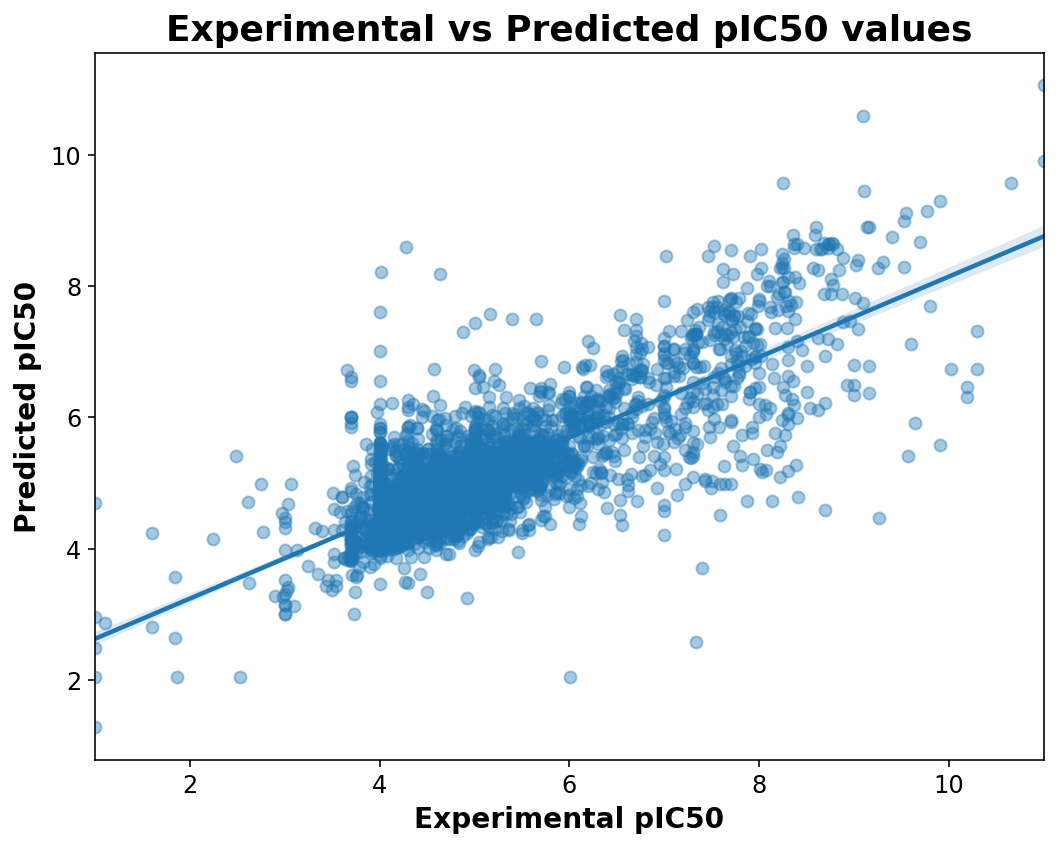

In [71]:
plt.figure(figsize=(8.5, 6.5))


sns.regplot(y_test,
            forest_reg_predictions,
            scatter_kws={'alpha':0.4})

plt.xlabel('Experimental pIC50', fontsize=14, fontweight='bold')
plt.ylabel('Predicted pIC50', fontsize=14, fontweight='bold')
plt.title('Experimental vs Predicted pIC50 values', fontsize=18, fontweight="bold")
# plt.savefig('Experimental vs Predicted pIC50 values.png', format='png', bbox_inches='tight', pad_inches=0, dpi=1200)
plt.show()

In [52]:
feature_importance = forest_reg.feature_importances_
feature_importance[:10]

array([0.01533542, 0.01597029, 0.00553665, 0.00859443, 0.0105157 ,
       0.0055851 , 0.01433614, 0.00519169, 0.00995808, 0.01537421])

In [63]:
df_features = pd.DataFrame(feature_importance, index=X.columns)
df_features.rename(columns={0: 'score'}, inplace=True)
df_features.sort_values(by='score', ascending=False, inplace=True)
df_features =  df_features.iloc[:10]
df_features

,score
PubchemFP335,0.016865
PubchemFP3,0.015970
PubchemFP150,0.015374
PubchemFP2,0.015335
PubchemFP143,0.014336
PubchemFP186,0.013259
PubchemFP199,0.013132
PubchemFP797,0.013071
PubchemFP776,0.012659
PubchemFP697,0.012440


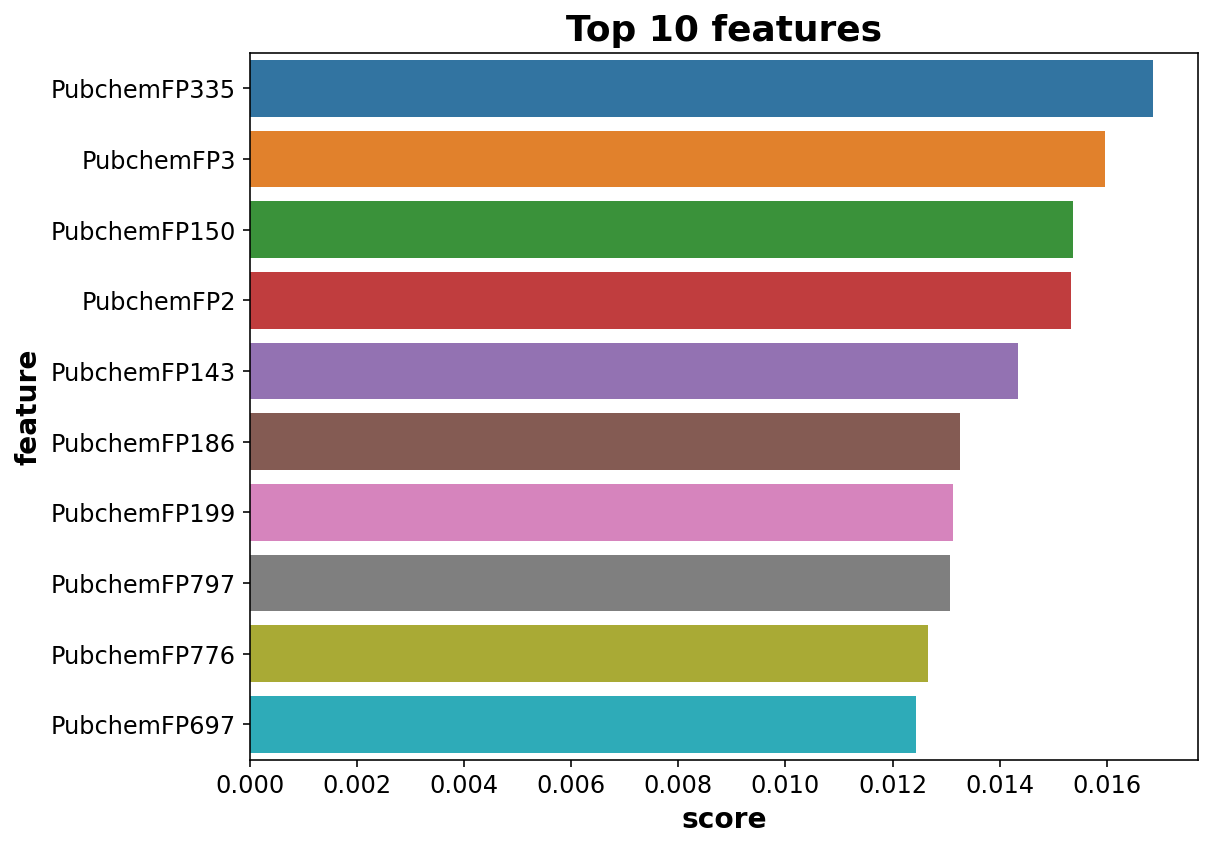

In [70]:
plt.figure(figsize=(8.5,6.5))
sns.barplot(data=df_features, x='score', y=df_features.index)
plt.title('Top 10 features', fontsize=18, fontweight="bold")
plt.xlabel('score', fontsize=14, fontweight="bold")
plt.ylabel('feature', fontsize=14, fontweight="bold")
# sns.despine(right=True, top=True)
# plt.savefig('Top 10 feature importance.png', format='png', bbox_inches='tight', pad_inches=0, dpi=1200)
plt.show()